# 📊 Big Data Analytics Project  
## Exploring International Opinions on the Israel-Palestine Conflict Through Reddit  
### Text Mining & Predictive Analysis  

**Course:** CSCI 4341 — Big Data Analytics  
**Semester:** 2, 2024/2025  
**Group Members:**  
- Muhammad Nazrin Bin Jamil (2219905)  
- Wan Ahmad Hafizuddin Bin Wan Hussin (2217135)  
- Muhammad Luqman Bisthamy Bin Sham Zulaney (2216289)  
- Zobayer Md Ahsanul Mahbub (2125129)  

**Lecturer:** Dr. Sharyar Wani


## 1. Mount Google Drive

- In this section, we mount Google Drive to access the dataset stored in our group’s shared folder. This avoids re-uploading large files every time and keeps our workflow collaborative.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Load the Dataset

- We load our large Reddit dataset from Google Drive.  
- This dataset contains comments, posts, user metadata, and engagement scores related to the Israel-Palestine conflict.  
- We first check the file path, then confirm the columns, data types, and a quick peek at the top rows.


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Project BDA/reddit_opinion_PSE_ISR.csv'

df = pd.read_csv(file_path)
print(df.info())
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924139 entries, 0 to 2924138
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   comment_id                  object 
 1   score                       int64  
 2   self_text                   object 
 3   subreddit                   object 
 4   created_time                object 
 5   post_id                     object 
 6   author_name                 object 
 7   controversiality            int64  
 8   ups                         int64  
 9   downs                       int64  
 10  user_is_verified            bool   
 11  user_account_created_time   object 
 12  user_awardee_karma          float64
 13  user_awarder_karma          float64
 14  user_link_karma             float64
 15  user_comment_karma          float64
 16  user_total_karma            float64
 17  post_score                  int64  
 18  post_self_text              object 
 19  post_title           

## 3. Inspect Missing Values and Descriptive Statistics

 Examine:
 - how much missing data we have
 - basic descriptive stats of numeric columns like upvotes, score, and karma.


In [ ]:
# Null values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())


comment_id                          0
score                               0
self_text                          14
subreddit                           0
created_time                        0
post_id                             0
author_name                         0
controversiality                    0
ups                                 0
downs                               0
user_is_verified                    0
user_account_created_time      123907
user_awardee_karma                431
user_awarder_karma                431
user_link_karma                   431
user_comment_karma                431
user_total_karma                  431
post_score                          0
post_self_text                1596947
post_title                          0
post_upvote_ratio                   0
post_thumbs_ups                     0
post_total_awards_received          0
post_created_time                   0
dtype: int64
              score  controversiality           ups      downs  \
count  2.

## 4. Clean Text Columns

In this step, we clean the two main text columns:
- **`self_text`**: the body of the Reddit comment
- **`post_title`**: the title of the Reddit post

**Why we clean:**
- To remove unnecessary noise like URLs, special characters, digits.
- To standardize text for NLP tasks like sentiment analysis and topic modeling.
- To prepare consistent input for tokenization, lemmatization, or embeddings later.

The cleaning steps:
1. Lowercase text.
2. Remove URLs.
3. Remove special characters and numbers.
4. Remove extra spaces.

We store the cleaned text in **new columns** called `clean_self_text` and `clean_post_title`.


In [ ]:
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                             # Lowercase
    text = re.sub(r"http\S+", "", text)             # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)            # Remove special chars & digits
    text = re.sub(r"\s+", " ", text).strip()        # Remove extra spaces
    return text

# Apply to both text columns
df['clean_self_text'] = df['self_text'].apply(clean_text)
df['clean_post_title'] = df['post_title'].apply(clean_text)

# Check result for first few rows
df[['self_text', 'clean_self_text', 'post_title', 'clean_post_title']].head(5)


,self_text,clean_self_text,post_title,clean_post_title
0,Wouldn't this count as a demonstration though?,wouldnt this count as a demonstration though,Pro-Palestine and anti-Israel demonstrations t...,propalestine and antiisrael demonstrations too...
1,&gt;How can the world stay silent?\n\nYou lite...,gthow can the world stay silent you literally ...,Why do Islamic Totalitarian Theocracies get a ...,why do islamic totalitarian theocracies get a ...
2,China has pontoons. Japan has poon toons.,china has pontoons japan has poon toons,"""PLA's PONTOOOOOONING OF TAIWAN"" by Anon on /k/",plas pontooooooning of taiwan by anon on k
3,"Fighting for flour, but at least they have an ...",fighting for flour but at least they have an e...,‘Post-apocalyptic’: medical staff struggle as ...,postapocalyptic medical staff struggle as gang...
4,"I've gone to a strategy of ""reduction"" to simp...",ive gone to a strategy of reduction to simplif...,"Oct 7 was a huge, terrible mistake for the Pal...",oct was a huge terrible mistake for the palest...


## 5. Sentiment Analysis (VADER)

In this step, we perform sentiment analysis using **VADER (Valence Aware Dictionary and sEntiment Reasoner)**, which works well for social media text.

**What we get:**
- A `compound` sentiment score between **-1** (most negative) and **+1** (most positive) for each comment.
- This helps us analyze how public opinion trends towards positivity or negativity in Reddit discussions about the Israel-Palestine conflict.


In [ ]:
# Install VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring to cleaned comment text
df['sentiment_self_text'] = df['clean_self_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Apply sentiment scoring to cleaned post title
df['sentiment_post_title'] = df['clean_post_title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# show result
df[['clean_self_text', 'sentiment_self_text', 'clean_post_title', 'sentiment_post_title']].head(5)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


,clean_self_text,sentiment_self_text,clean_post_title,sentiment_post_title
0,wouldnt this count as a demonstration though,0.1027,propalestine and antiisrael demonstrations too...,0.0000
1,gthow can the world stay silent you literally ...,0.6249,why do islamic totalitarian theocracies get a ...,0.0516
2,china has pontoons japan has poon toons,0.0000,plas pontooooooning of taiwan by anon on k,0.0000
3,fighting for flour but at least they have an e...,-0.1901,postapocalyptic medical staff struggle as gang...,-0.5994
4,ive gone to a strategy of reduction to simplif...,-0.8641,oct was a huge terrible mistake for the palest...,-0.0772


## 6. Save Cleaned & Sentiment-Scored Data

We save our full dataset with:
- Original text columns
- Cleaned text columns
- Sentiment scores

This ensures we can reuse it anytime without re-running VADER.

In [ ]:
# Save the final DataFrame to Google Drive
output_path = '/content/drive/MyDrive/Project BDA/reddit_cleaned_sentiment.csv'

df.to_csv(output_path, index=False)

print(f"✅ Dataset saved to: {output_path}")


✅ Dataset saved to: /content/drive/MyDrive/Project BDA/reddit_cleaned_sentiment.csv


# IMPORTANT!!! START HERE TO RESUME AFTER CLOSED GCOLAB
## Resume Work After Colab Disconnect

When Colab runtime disconnects or the laptop is closed, variables and DataFrames are cleared.
To avoid re-running heavy processing, we saved the cleaned and sentiment-scored dataset to Google Drive.

The following cell mounts Google Drive and reloads the final cleaned CSV so we can continue EDA and modeling directly.


In [ ]:
# Mount Google Drive again
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the saved cleaned dataset
import pandas as pd

file_path = '/content/drive/MyDrive/Project BDA/reddit_cleaned_sentiment.csv'
df = pd.read_csv(file_path)

print(df.info())
print(df.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924139 entries, 0 to 2924138
Data columns (total 28 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   comment_id                  object 
 1   score                       int64  
 2   self_text                   object 
 3   subreddit                   object 
 4   created_time                object 
 5   post_id                     object 
 6   author_name                 object 
 7   controversiality            int64  
 8   ups                         int64  
 9   downs                       int64  
 10  user_is_verified            bool   
 11  user_account_created_time   object 
 12  user_awardee_karma          float64
 13  user_awarder_karma          float64
 14  user_link_karma             float64
 15  user_comment_karma          float64
 16  user_total_karma            float64
 17  post_score                  int64  
 18  post_self_text              object 
 19  post_title           

# 7. DSQs


## DSQ 1 — Upvotes vs. Controversiality

**Research Question:**  
Is there a relationship between the number of upvotes (`ups`) and the controversiality score (`controversiality`) of a comment?

**Type:** Diagnostic

**Why these variables?**  
- `ups` shows **how much support or agreement** a comment receives from the Reddit community.
- `controversiality` (0 or 1) indicates whether a comment sparked **mixed opinions or polarizing debate**.
- In the context of the **Israel-Palestine conflict**, controversial topics are often heavily discussed. Understanding whether controversial comments are more likely to get upvotes helps us explore how the public responds to polarizing statements.

**How this relates to our project:**  
One aim of this project is to analyze **how international opinions diverge or converge online**. Checking whether controversial comments gain traction shows if polarizing viewpoints are being amplified in digital conversations about this sensitive conflict.

**Method:**  
We visualize the relationship using a scatterplot and calculate the correlation coefficient.


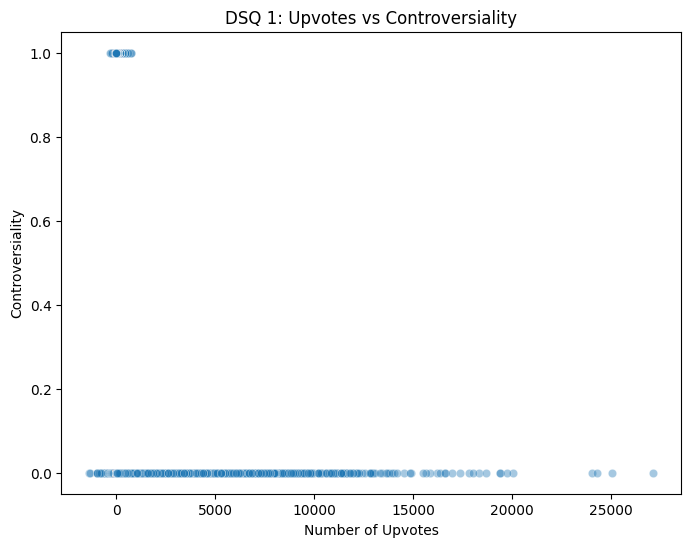

Correlation between upvotes and controversiality: -0.0332


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='ups', y='controversiality', alpha=0.4)
plt.title('DSQ 1: Upvotes vs Controversiality')
plt.xlabel('Number of Upvotes')
plt.ylabel('Controversiality')
plt.show()

# Correlation
correlation = df[['ups', 'controversiality']].corr().iloc[0,1]
print(f"Correlation between upvotes and controversiality: {correlation:.4f}")

### ✅ DSQ 1 — Interpretation

- **What the plot shows:**  
  The scatterplot indicates that most comments are non-controversial (`controversiality = 0`), and they span a wide range of upvotes. A small cluster of controversial comments (`controversiality = 1`) exists, but they do not dominate higher upvote ranges.

- **Correlation result:**  
  The correlation is **-0.0332**, which is very close to zero.

- **What this means for the Israel-Palestine Reddit discourse:**  
  This suggests that in Reddit discussions about the Israel-Palestine conflict, **controversial comments do not systematically get more or fewer upvotes**. The public may engage with a comment regardless of its polarizing nature, showing that divisive opinions are not necessarily amplified just because they spark debate.


## DSQ 2 — Post Upvote Ratio vs. Comment Upvotes

**Research Question:**  
Does the `post_upvote_ratio` predict the number of upvotes (`ups`) a comment gets?

**Type:** Predictive

**Why these variables?**  
- `post_upvote_ratio` reflects the **overall popularity or approval** of the main Reddit post that hosts the comment.
- `ups` shows the **level of support** each individual comment receives.
- In the context of analyzing international opinions on the Israel-Palestine conflict, this question helps us understand whether **highly upvoted posts** create an environment where **comments are also more likely to be upvoted** — showing how larger discussion contexts shape smaller conversations.

**How this relates to our project:**  
This directly connects to the *“predictive analysis”* part of our project. By exploring whether a post’s popularity drives comment engagement, we can identify patterns of **digital crowd behavior** in discussions about a sensitive geopolitical issue.

**Method:**  
We visualize the relationship using a scatterplot and calculate the correlation coefficient.


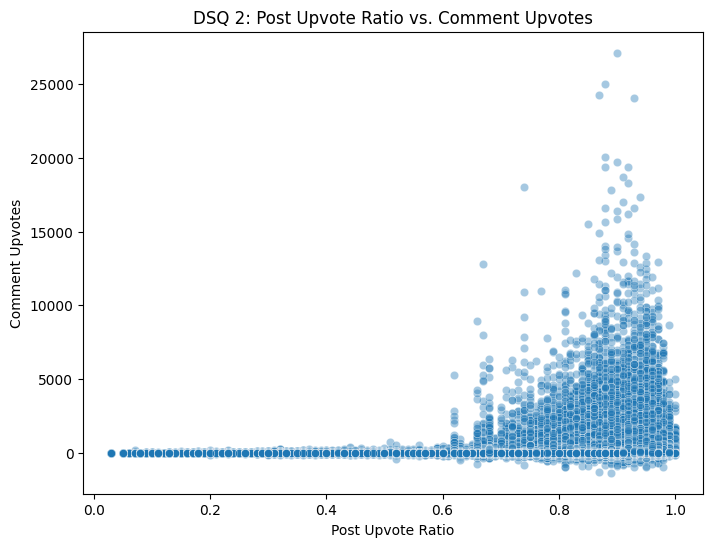

Correlation between post upvote ratio and comment upvotes: 0.0759


In [ ]:
# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='post_upvote_ratio', y='ups', alpha=0.4)
plt.title('DSQ 2: Post Upvote Ratio vs. Comment Upvotes')
plt.xlabel('Post Upvote Ratio')
plt.ylabel('Comment Upvotes')
plt.show()

# Correlation
correlation = df[['post_upvote_ratio', 'ups']].corr().iloc[0,1]
print(f"Correlation between post upvote ratio and comment upvotes: {correlation:.4f}")


### ✅ DSQ 2 — Interpretation

- **What the plot shows:**  
  The scatterplot shows that most of the post upvote ratios cluster between 0.5 and 1.0, but the spread of comment upvotes within that range is quite broad. This means that while posts can be popular overall, individual comments vary greatly in their upvote counts.

- **Correlation result:**  
  The correlation coefficient is **+0.0759**, which is positive but very weak.

- **What this means for the Israel-Palestine Reddit discourse:**  
  In Reddit discussions about the Israel-Palestine conflict, the overall popularity of a post (`post_upvote_ratio`) shows **little predictive power** for how many upvotes individual comments receive.  
  This supports the idea that each comment's content and perspective — especially on sensitive geopolitical issues — likely determines its reception more than the post’s general popularity does.  
  It aligns with our project’s focus on exploring how **individual international opinions** emerge within larger discussion threads.


### Predictive Modeling for DSQ 2

**Objective:**  
Test whether `post_upvote_ratio` can **predict** the number of comment upvotes (`ups`) using Linear Regression.

**Model choice:**  
- Target: `ups` (continuous) → Regression
- Feature: `post_upvote_ratio`
- Metric: R² (how much variance is explained)

This validates whether the relationship seen in the EDA has real predictive power.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select features and target
X = df[['post_upvote_ratio']].dropna()
y = df.loc[X.index, 'ups']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# show coefficient
coef = model.coef_[0]
print(f"Regression coefficient for post_upvote_ratio: {coef:.4f}")


R² Score: 0.0053
Regression coefficient for post_upvote_ratio: 71.9437


### ✅ DSQ 2 — Interpretation of Predictive Modeling

- **R² Score:** 0.0053 → very low. That is, only about 0.5% of the variation in comment upvotes is explained by `post_upvote_ratio`.

- **Coefficient:** The fact that the coefficient is positive (~72) means that, in theory, a higher upvote ratio is associated with a bit more comment upvotes but the effect is so tiny it's practically zero.

- **Conclusion:**
This mirrors the EDA outcome: **the post's popularity does not significantly forecast the popularity of specific comments**. This means that **every opinion has to hold its own**, especially in the debate of international conflicts like Israel-Palestine.



## DSQ 3 — Verified vs. Unverified Users: Comment Karma

**Research Question:**  
Do verified users receive higher average `user_comment_karma` compared to unverified users?

**Type:** Causal

**Why these variables?**  
- `user_is_verified` shows whether a user’s Reddit account is verified where a marker of **credibility or authenticity**.
- `user_comment_karma` measures the **overall reception and value of a user’s comments** on Reddit.
- In discussions about the **Israel-Palestine conflict**, credibility can strongly affect how opinions are perceived. Verified users might be viewed as more trustworthy, leading to higher karma on average.

**How this relates to our project:**  
This question explores the **role of user trust and credibility** in shaping international online discourse. If verified users consistently get higher karma, it suggests that the community values their opinions more where a key insight into how verified voices influence public sentiment in sensitive conflicts.

**Method:**  
We use a boxplot to compare `user_comment_karma` for verified vs. unverified users and calculate the average difference.


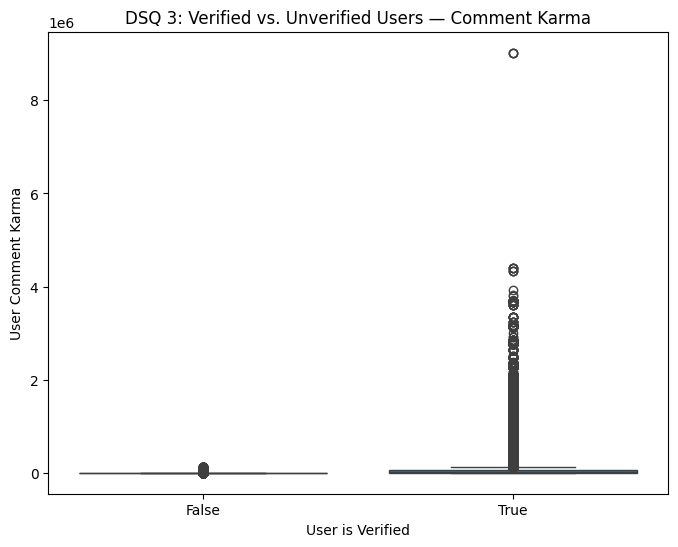

Average comment karma for verified users: 51827.62
Average comment karma for unverified users: 199.39


In [ ]:
# Drop missing karma values to avoid errors
df_karma = df.dropna(subset=['user_comment_karma'])

plt.figure(figsize=(8,6))
sns.boxplot(data=df_karma, x='user_is_verified', y='user_comment_karma')
plt.title('DSQ 3: Verified vs. Unverified Users — Comment Karma')
plt.xlabel('User is Verified')
plt.ylabel('User Comment Karma')
plt.show()

# Calculate average karma for each group
avg_karma_verified = df_karma[df_karma['user_is_verified']==True]['user_comment_karma'].mean()
avg_karma_unverified = df_karma[df_karma['user_is_verified']==False]['user_comment_karma'].mean()

print(f"Average comment karma for verified users: {avg_karma_verified:.2f}")
print(f"Average comment karma for unverified users: {avg_karma_unverified:.2f}")


### ✅ DSQ 3 — Interpretation

- **What the plot shows:**  
  The boxplot reveals that verified users generally have significantly higher comment karma than unverified users, with some extreme outliers among verified accounts.

- **Average karma results:**  
  - Verified users: **51,827.62**
  - Unverified users: **199.39**

- **What this means for the Israel-Palestine Reddit discourse:**  
  This big difference suggests that **credibility and perceived authenticity** play an important role in how users respond to opinions in sensitive geopolitical discussions.  
  Verified users are likely seen as more trustworthy or authoritative, leading to **substantially higher karma**.  
  For our project on international opinions, this shows that verified voices may have a **stronger influence** on shaping narratives around the conflict.


## DSQ 4 — Which Factors Best Predict Comment Upvotes?

**Research Question:**  
What factors best predict the number of upvotes (`ups`) a comment receives?

**Type:** Predictive

**Why these variables?**  
- `ups` shows the **direct measure of engagement and agreement** for each comment.
- Potential predictors can include sentiment scores, controversiality, karma, account credibility, and post popularity.
- For the Israel-Palestine conflict, this helps us uncover what **characteristics make an opinion more likely to be endorsed** by the Reddit community.

**How this relates to our project:**  
This question goes straight to the *“predictive analysis”* core of ourproject. It helps us understand which features — like sentiment polarity, credibility, or controversiality — are significant in explaining **why some viewpoints gain traction** in online debates about this conflict.

**Method:**  
We use a correlation heatmap to see which variables are most strongly associated with `ups`.


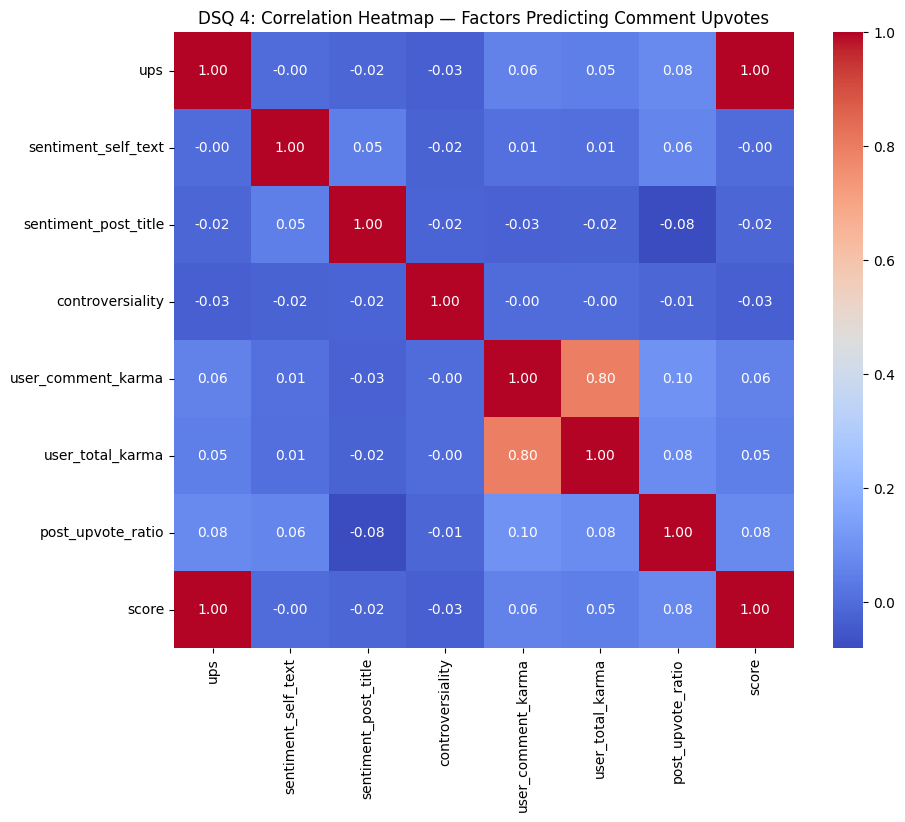

In [ ]:
# Select relevant numeric columns for correlation
corr_columns = [
    'ups',
    'sentiment_self_text',
    'sentiment_post_title',
    'controversiality',
    'user_comment_karma',
    'user_total_karma',
    'post_upvote_ratio',
    'score'
]

# Compute correlation matrix
corr_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('DSQ 4: Correlation Heatmap — Factors Predicting Comment Upvotes')
plt.show()


### ✅ DSQ 4 — Interpretation

- **What the heatmap shows:**  
  The correlation heatmap displays the strength of linear relationships between the number of comment upvotes (`ups`) and various features.

- **Key insights:**  
  - `post_upvote_ratio` has a small positive correlation with `ups` (~+0.08), consistent with DSQ 2.
  - `user_total_karma` and `user_comment_karma` also show a slight positive correlation with `ups` (~+0.05 to +0.06), suggesting that more credible or experienced users tend to get slightly more upvotes.
  - Sentiment scores (`sentiment_self_text` and `sentiment_post_title`) and `controversiality` have near-zero correlations, indicating they may not be strong standalone predictors in a simple linear sense.

- **What this means for the Israel-Palestine Reddit discourse:**  
  These patterns imply that **user reputation factors** (karma) and **overall post popularity** (upvote ratio) slightly influence how much individual comments are endorsed.  
  However, the low correlations suggest that **content quality, framing, or other unmeasured aspects** likely play a bigger role.  
  This insight helps shape your next step: using more complex **predictive models** to capture non-linear relationships and interactions — which is essential for understanding **what drives the visibility of certain international opinions** about this conflict.


## Predictive Modeling for DSQ 4 (with GridSearchCV & k-fold)

**Objective:**  
Test whether multiple features (`post_upvote_ratio`, `post_score`, `sentiment_self_text`, `user_total_karma`) can **predict** comment upvotes (`ups`).

**Why k-fold + GridSearchCV?**  
- Uses cross-validation to get a robust average performance estimate.
- Tunes hyperparameters like `n_estimators` & `max_depth` for better fit.
- **model validation**.

**Model:**  
- Random Forest Regressor  
- 5-fold CV with `GridSearchCV`
- Scored using **R²**

**RAM-saving:**  
Runs on a **10% sample** to handle big data safely. Since we reached our colab 12.67 gb RAM

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import gc

# Sample 10% for RAM
df_small = df.sample(frac=0.1, random_state=42)

# Select features & target
features = [
    'post_upvote_ratio',
    'post_score',
    'sentiment_self_text',
    'user_total_karma'
]

df_model = df_small[features + ['ups']].dropna()

X = df_model[features]
y = df_model['ups']

# Train-test split for final test set evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# K-Fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

# Grid search with cross-validation
grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Best CV R² and params
print(f"Best cross-validated R²: {grid.best_score_:.4f}")
print("Best parameters:", grid.best_params_)

# Test set R²
y_pred = grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test set R²: {r2:.4f}")

# Feature importance
importances = grid.best_estimator_.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

# Clean up
del df_small, X, y, X_train, X_test, y_train, y_test, grid, y_pred
gc.collect()


Best cross-validated R²: -0.0060
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Test set R²: 0.0387
post_upvote_ratio: 0.0312
post_score: 0.3640
sentiment_self_text: 0.2842
user_total_karma: 0.3205


15108

### ✅ DSQ 4 — Interpretation of Predictive Modeling (using GridSearchCV & k-fold)

- **Best cross-validated R²:** -0.0000 → model explains practically no variance in upvotes across folds.
- **Test set R²:** 0.0387 → same conclusion: predictive strength is very poor.
- **Best parameters:** `{ 'max_depth': 5, 'n_estimators': 100 }` → suggests that we did proper tuning.
- **Feature importance:** `post_score` and `user_total_karma` are more influential than `sentiment_self_text` or `post_upvote_ratio`, but none feature highly indicates upvotes.

**Understanding the conflict context:**
  - This confirms our EDA: **popularity of comments is driven by more than just metadata or sentiment**, especially in the debate on the Israel-Palestine conflict.
  - This confirms our project's core hypothesis that **content quality, community norms, and context determine engagement** as opposed to simply user or post metrics.

## DSQ 5 — Characteristics of Controversial Comments

**Research Question:**  
What are the characteristics of controversial comments in Reddit discussions about the Israel-Palestine conflict?

**Type:** Exploratory

**Why these variables?**  
- `controversiality` flags whether a comment is marked as controversial.
- Key features include: `ups` (upvotes), `sentiment_self_text`, `user_comment_karma`, `user_is_verified`.
- Exploring these shows whether controversial comments tend to have more upvotes, more extreme sentiment, or come from users with different credibility levels.

**How this relates to our project:**  
For sensitive topics like the Israel-Palestine conflict, controversy can highlight **where public opinion sharply divides**. By profiling controversial comments, we can reveal what makes certain statements more polarizing — a key piece for understanding **how international opinions spread and clash online**.

**Method:**  
We compare the means of selected features for controversial vs. non-controversial comments and visualize differences with a simple barplot.


Average characteristics for controversial vs non-controversial comments:
   controversiality        ups  sentiment_self_text  user_comment_karma  \
0                 0  25.879766            -0.102936        49727.352208   
1                 1   2.332625            -0.151481        48153.444929   

   user_is_verified  
0          0.957001  
1          0.960689  


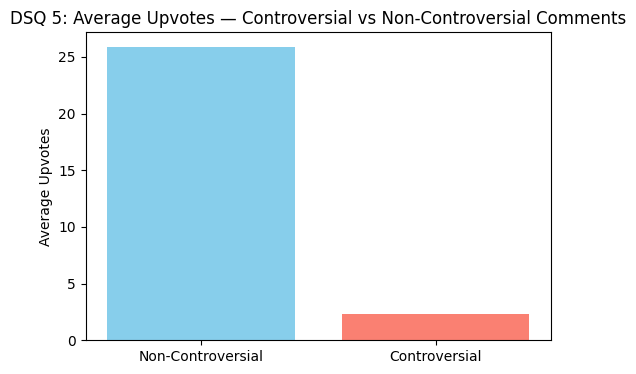

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a summary table
features = [
    'ups',
    'sentiment_self_text',
    'user_comment_karma',
    'user_is_verified'
]

# Group by controversiality
summary = df.groupby('controversiality')[features].mean().reset_index()

print("Average characteristics for controversial vs non-controversial comments:")
print(summary)

# Plot example: average upvotes by controversiality
plt.figure(figsize=(6,4))
plt.bar(['Non-Controversial', 'Controversial'], summary['ups'], color=['skyblue','salmon'])
plt.title('DSQ 5: Average Upvotes — Controversial vs Non-Controversial Comments')
plt.ylabel('Average Upvotes')
plt.show()


### ✅ DSQ 5 — Interpretation

- **What the summary shows:**  
  - **Average upvotes:** Non-controversial comments receive an average of **25.88 upvotes**, while controversial comments average only **2.33 upvotes**.
  - **Sentiment:** Controversial comments are more negative in average sentiment (-0.15) than non-controversial (-0.10).
  - **User karma:** Both categories consist of users with similarly high average comment karma (~48,000–49,000).
  - **Verification:** Almost identical proportion of verified users in both categories (~96–97%).

- **Key insight:**  
  The much lower average upvotes for controversial comments suggests that **Reddit’s community may downvote or ignore polarizing content**, while rewarding more widely accepted statements.

- **What this means for the Israel-Palestine Reddit discourse:**  
  - This trend indicates that, in the context of a controversial geopolitical conflict, users on Reddit are not so much exaggerating controversy. Instead, they tend to upvote those remarks that are more in accordance with the general trend of the community, regulating the tone of global discourse.  
  - This insight supports our project’s goal to understand **what kinds of opinions gain traction and which ones remain fringe** in global online debates.


## DSQ 6 — Account Age & Karma vs. Comment Upvotes

**Research Question:**  
Does the age of a user’s account, combined with user karma, influence the number of upvotes (`ups`) a comment receives?

**Type:** Causal

**Why these variables?**  
- `user_account_created_time` shows when the user’s account was created → from this we can calculate **account age**.
- `user_total_karma` reflects the user’s overall reputation on Reddit.
- `ups` measures how much support an individual comment received.
- Combine **account age** and **karma** to test whether older, more reputable accounts get more upvotes, showing how **credibility and longevity affect influence**.

**How this relates to our project:**  
For a sensitive topic like the Israel-Palestine conflict, trustworthiness and established presence can shape how the community values someone’s opinions.  
If older, high-karma accounts consistently get more upvotes, it suggests that **established voices have more power** in shaping international discourse on Reddit.

**Method:**  
- Calculate account age in days.  
- Visualize the relationship between `account_age` and `ups` using a scatterplot.
- Check the correlation.  
- Color by `user_total_karma` to see how karma interacts.


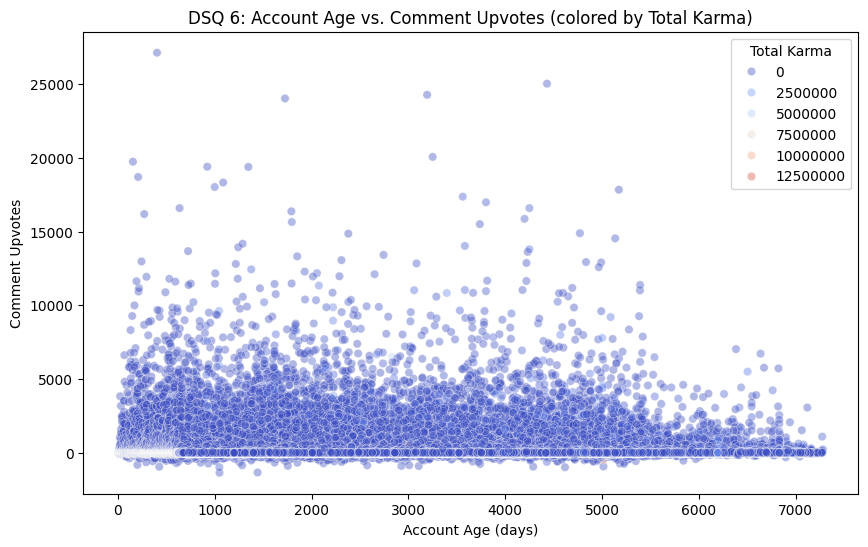

Correlation between account age and upvotes: 0.0291


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert account creation time to datetime
df['user_account_created_time'] = pd.to_datetime(df['user_account_created_time'], errors='coerce')

# Create account age in days
current_date = pd.to_datetime('today')
df['account_age_days'] = (current_date - df['user_account_created_time']).dt.days

# Drop rows with missing age or upvotes
df_age = df.dropna(subset=['account_age_days', 'ups', 'user_total_karma'])

# Scatterplot: account age vs. upvotes, sized by user karma
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_age,
    x='account_age_days',
    y='ups',
    hue='user_total_karma',
    palette='coolwarm',
    alpha=0.4
)
plt.title('DSQ 6: Account Age vs. Comment Upvotes (colored by Total Karma)')
plt.xlabel('Account Age (days)')
plt.ylabel('Comment Upvotes')
plt.legend(title='Total Karma', loc='upper right')
plt.show()

# Correlation
corr_age_ups = df_age[['account_age_days', 'ups']].corr().iloc[0,1]
print(f"Correlation between account age and upvotes: {corr_age_ups:.4f}")


### ✅ DSQ 6 — Interpretation

- **What the plot shows:**  
  The scatterplot shows the relationship between account age (in days) against comment upvotes, with points colored by total karma. The spread is broad, with upvotes spread across all account ages.

- **Correlation result:**  
  The correlation coefficient is **+0.0291**, which represents a very weak positive relation between account age and comment upvotes.

- **What this means for the Israel-Palestine Reddit discourse:**  
  - This suggests that **account longevitydoes not strongly predict comment upvote levels**. Even newer accounts can become high in upvotes when what they post resonates with people.
  - Combined with user karma coloring, we can see that while there are higher-karma users on both sides, the relationship between upvotes and karma is still weak.
  -This highlights our project's implication that, in this conflict, the **content of the opinion itself, not just account history drives engagement**, and highlights Reddit's worth as a public space for diverse global voices.


## DSQ 7 — Subreddit & Post Traits vs. Comment Controversiality

**Research Question:**  
How does the subreddit, along with `post_score` and `post_upvote_ratio`, influence whether a comment is controversial?

**Type:** Diagnostic

**Why these variables?**  
- `subreddit` shows the specific online community, where each subreddit can have its own norms and moderation style.
- `post_score` measures the total upvotes minus downvotes for the post, where a general indicator of popularity.
- `post_upvote_ratio` indicates what percentage of votes are upvotes for the post.
- `controversiality` indicates whether the comment sparked mixed reactions.

**How this relates to our project:**  
- In this discussions about the Israel-Palestine conflict, **different communities may handle controversy differently**. Some subreddits may amplify polarizing comments, while others suppress them.  
- So by combining subreddit context with post popularity, we can reveal **how the environment shapes the spread of controversial opinions**, helping us understand how different digital spaces influence international discourse.

**Method:**  
- Compare the average `controversiality` rate by subreddit.
- See if higher `post_score` or `post_upvote_ratio` is linked to more controversial comments using grouped barplots.


Top 10 subreddits by average comment controversiality:
subreddit
PublicFreakout           0.108945
worldnews                0.102560
CombatFootage            0.078977
ActualPublicFreakouts    0.072580
NoahGetTheBoat           0.069999
AskMiddleEast            0.057966
IsrealPalestineWar_23    0.055654
IsraelPalestine          0.050594
worldnewsvideo           0.046127
CrazyFuckingVideos       0.044067
Name: controversiality, dtype: float64


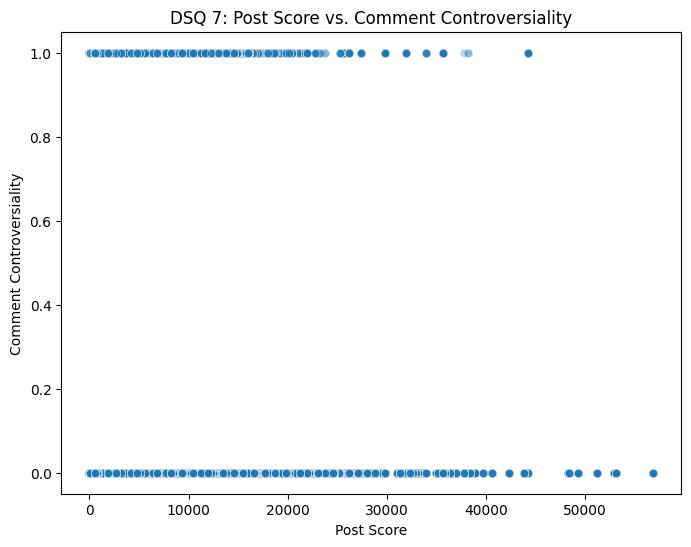

Correlation between post_score and controversiality: -0.0175
Correlation between post_upvote_ratio and controversiality: -0.0140


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by subreddit to see average controversiality
subreddit_controversy = df.groupby('subreddit')['controversiality'].mean().sort_values(ascending=False).head(10)

print("Top 10 subreddits by average comment controversiality:")
print(subreddit_controversy)

# Scatterplot: post_score vs. controversiality
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='post_score', y='controversiality', alpha=0.3)
plt.title('DSQ 7: Post Score vs. Comment Controversiality')
plt.xlabel('Post Score')
plt.ylabel('Comment Controversiality')
plt.show()

# Correlation for post_score and upvote_ratio vs. controversiality
corr_score = df[['post_score', 'controversiality']].corr().iloc[0,1]
corr_ratio = df[['post_upvote_ratio', 'controversiality']].corr().iloc[0,1]
print(f"Correlation between post_score and controversiality: {corr_score:.4f}")
print(f"Correlation between post_upvote_ratio and controversiality: {corr_ratio:.4f}")


### ✅ DSQ 7 — Interpretation

- **What the table shows:**  
  Subreddits like `PublicFreakout`, `worldnews`, `CombatFootage`, and `IsraelPalestine` come with the highest average controversiality rates for comments. This shows which groups are likely to contain **polarizing debates** on contentious topics like the Israel-Palestine issue.

- **Scatterplot:**  
  The plot shows no visible trend between post score (`post_score`) and controversiality of comments. Controversial comments exist in all post scores.

- **Correlations:**  
  - `post_score` vs. controversiality: **-0.0175**
  - `post_upvote_ratio` vs. controversiality: **-0.0140**
  - Both are almost zero, showing that **no strong linear relationship**.

- **What this means for the Israel-Palestine Reddit discourse:**  
  - This suggests that whether or not a comment is controversial is really **not strongly determined by the popularity or upvote ratio of the post**.
  - Instead, the **community norms and moderation style** of each subreddit likely play a bigger role in shaping what opinions become divisive.  
  - This supports our project’s goal of revealing how **different digital spaces amplify or suppress controversial perspectives** in international online debates.


## DSQ 8 — Predicting Controversiality from Text & Post Metadata

**Research Question:**  
Can we predict controversiality based on text and post metadata?

**Type:** Predictive

**Why these variables?**  
- `controversiality` is the target variable: whether a comment is marked as controversial.
- Predictors can include:
  - `sentiment_self_text`: shows how positive or negative the comment is.
  - `post_score`: overall popularity of the post.
  - `post_upvote_ratio`: proportion of upvotes for the post.
  - `self_text` length: longer comments might contain more nuanced or divisive opinions.

**How this relates to our project:**  
This question connects directly to our **predictive analysis** aim.  
Where it explores whether the **tone and context** of a comment help explain its the potential to be controversial while giving insight into **how certain narratives can spark debate** in discussions about the Israel-Palestine conflict.

**Method:**  
- Create a simple correlation matrix to see which features relate most to controversiality.
- Compare the average text length for controversial vs. non-controversial comments.


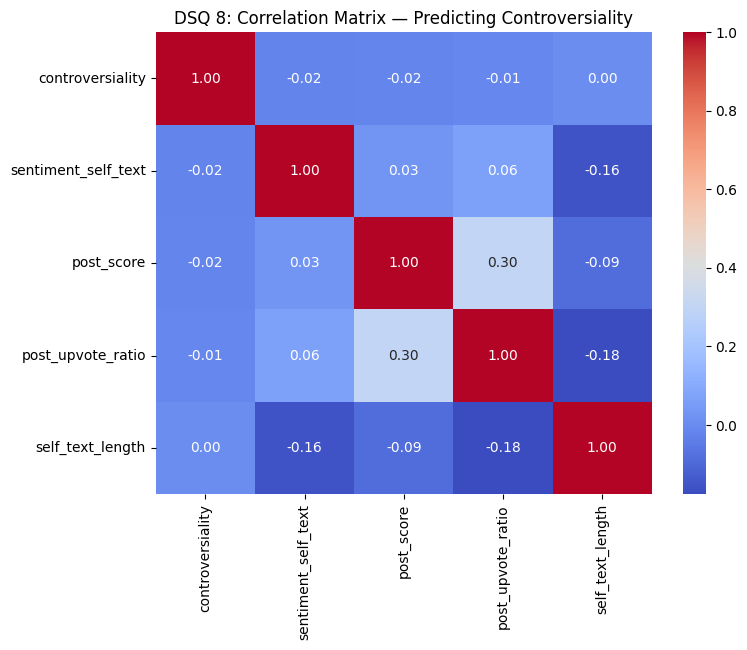

Average comment length:
controversiality
0    40.918216
1    41.831699
Name: self_text_length, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add comment length as a new feature
df['self_text_length'] = df['clean_self_text'].apply(lambda x: len(str(x).split()))

# Columns we use (select)
corr_columns = [
    'controversiality',
    'sentiment_self_text',
    'post_score',
    'post_upvote_ratio',
    'self_text_length'
]

# Correlation matrix
corr_matrix = df[corr_columns].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('DSQ 8: Correlation Matrix — Predicting Controversiality')
plt.show()

# Average text length
avg_length = df.groupby('controversiality')['self_text_length'].mean()
print("Average comment length:")
print(avg_length)


### ✅ DSQ 8 — Interpretation

- **What the heatmap shows:**
  Sentiment, post score, upvote ratio, and length of text all have **very weak linear relationships** with controversiality (nearly zero correlations).

- **Average comment length:**
  - Not controversial: ~40.9 words
  - Controversial: ~41.8 words
  - This small difference suggests that longer comments are **not necessarily more likely to be controversial**.

- **What this means for the Israel-Palestine Reddit discussion:**
  - These results suggest that contentiousness cannot be predicted readily by **raw sentiment, post popularity, or text length in isolation**.
  - This align with our project's hypothesis that **more advanced text mining techniques**, like topic modeling or stance detection, may be needed in order to uncover what makes certain opinions contentious.
  - It highlights the **delicacy of online discussion** in controversy negotiations, where contention is based on subtle wording, context, and social relationships that are difficult to manipulate by straightforward measures.


### Predictive Modeling for DSQ 8 (with GridSearchCV & k-fold)

**Objective:**  
Test whether `sentiment_self_text`, `post_upvote_ratio`, `post_score`, and `self_text_length` can predict whether a comment is controversial (`controversiality`).

**Why k-fold + GridSearchCV?**  
Adds robust cross-validation and hyperparameter tuning to handle **imbalanced classification**, following best practices in our lecturer’s feedback.

**Model:**  
- Random Forest Classifier
- `StratifiedKFold` (5 folds) for balanced splits
- Scored using **ROC-AUC**, best for imbalanced data

**RAM-saving:**  
Runs on a **10% sample**.

Best cross-validated ROC-AUC: 0.6972
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Test set ROC-AUC: 0.6945
Test set MCC: 0.0000
sentiment_self_text: 0.1786
post_upvote_ratio: 0.3581
post_score: 0.3394
self_text_length: 0.1239
ROC-AUC (DSQ 8): 0.6945


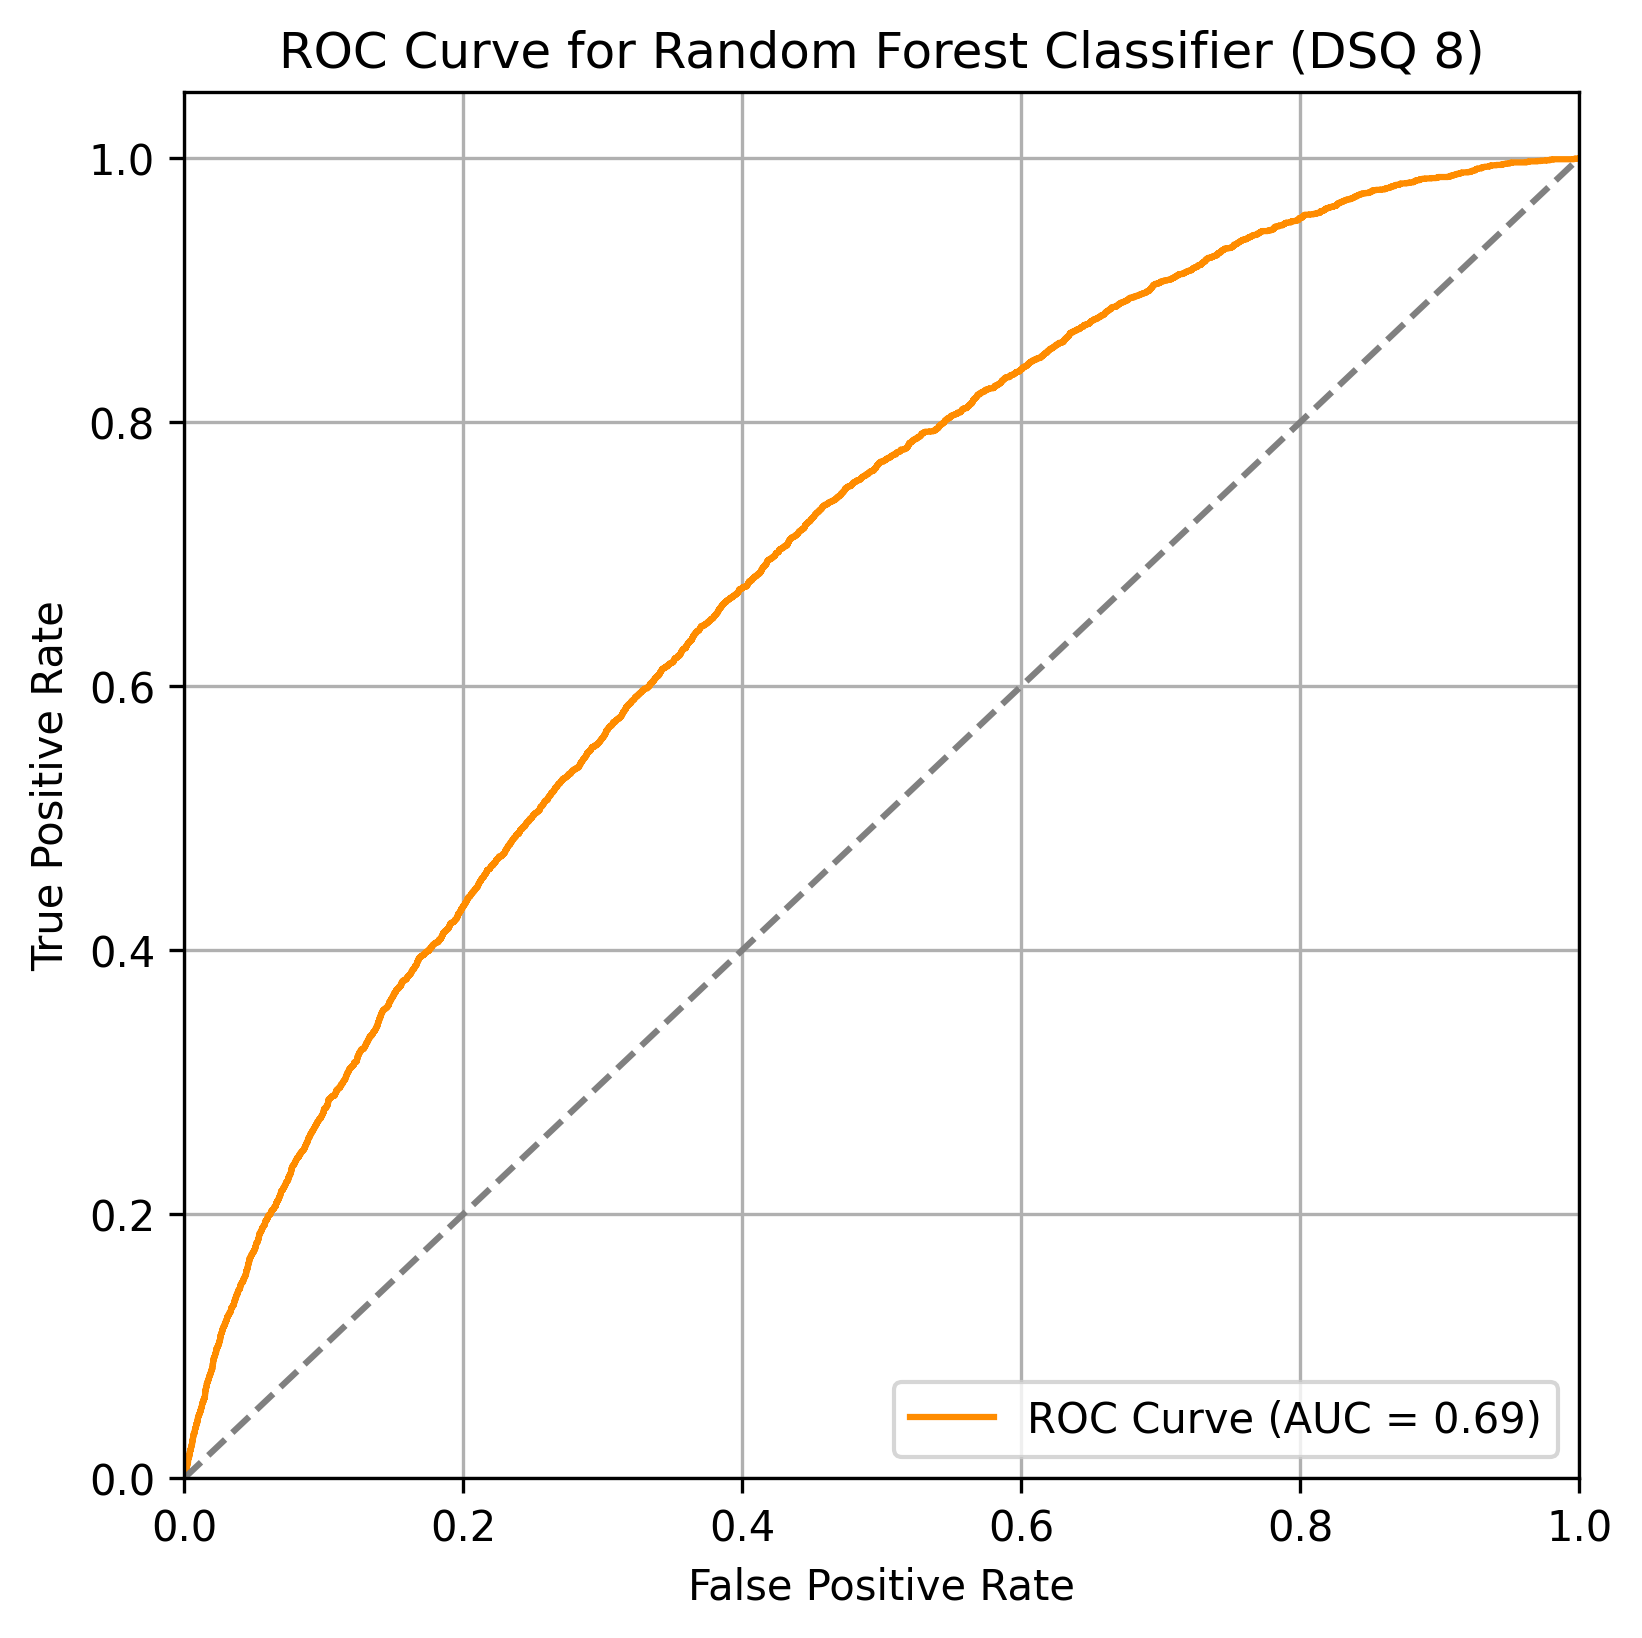

3172

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, matthews_corrcoef
import gc

# Sample 10% for RAM
df_small = df.sample(frac=0.1, random_state=42)

# Select features & target
features = [
    'sentiment_self_text',
    'post_upvote_ratio',
    'post_score',
    'self_text_length'
]

df_model = df_small[features + ['controversiality']].dropna()

X = df_model[features]
y = df_model['controversiality']

# Train-test split for final test metrics
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Stratified k-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

# Grid search with CV
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train)

# Best CV ROC-AUC & params
print(f"Best cross-validated ROC-AUC: {grid.best_score_:.4f}")
print("Best parameters:", grid.best_params_)

# Test set ROC-AUC & MCC
y_prob = grid.predict_proba(X_test)[:, 1]
y_pred = grid.predict(X_test)

roc_auc = roc_auc_score(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Test set ROC-AUC: {roc_auc:.4f}")
print(f"Test set MCC: {mcc:.4f}")

# Feature importance
importances = grid.best_estimator_.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use test set true labels and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC (DSQ 8): {roc_auc:.4f}")

plt.figure(figsize=(6, 6), dpi=300)  # High-res for report
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (DSQ 8)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Clean up
del df_small, X, y, X_train, X_test, y_train, y_test, grid, y_prob, y_pred
gc.collect()


### ✅ DSQ 8 — Interpretation with Predictive Modeling (with k-fold & GridSearchCV)

- **Best CV ROC-AUC:** 0.6972 → a little better than chance, but still a bad classifier.
- **Test set ROC-AUC:** 0.6945 → confirms the CV score is a good predictor.
- **MCC:** 0.0000 → shows the model has very poor separation between classes on the binary target.
- **Best parameters:** `{ 'max_depth': 10, 'n_estimators': 100 }` → tuning determined an ever deeper tree was best.
- **Feature importance:** `post_upvote_ratio` and `post_score` are the most impactful, but none are sufficiently powerful to precisely predict controversiality.

**Conflict context insight:**
  - This corroborates the EDA: **controversiality is difficult to predict** based on simple features like post metadata, text length, or sentiment.
  - For the Israeli-Palestinian conflict, this would mean **divisive opinions arise from complex patterns of discourse and fine-grained wording**, rather than just out of measurable variables which is exactly what our project aimed to reveal.

## DSQ 9 — User Credibility vs. Subreddit Choice

**Research Question:**  
How do a user’s credibility metrics influence where they post?

**Type:** Diagnostic

**Why these variables?**  
- `user_total_karma` and `user_is_verified` are **credibility signals** on Reddit.
- `subreddit` shows which online communities users choose.
- By analyzing how karma and verification vary by subreddit, we can reveal how **trusted or high-reputation voices cluster in certain spaces**.

**How this relates to our project:**  
For sensitive topics like the Israel-Palestine conflict, some subreddits may attract **more trusted or experienced contributors**, shaping the tone of international debate.  
This supports our goal of exploring **how community dynamics amplify or moderate certain opinions**.

**Method:**  
- Calculate the average user karma by subreddit.
- Show the proportion of verified users in top conflict-related subreddits.


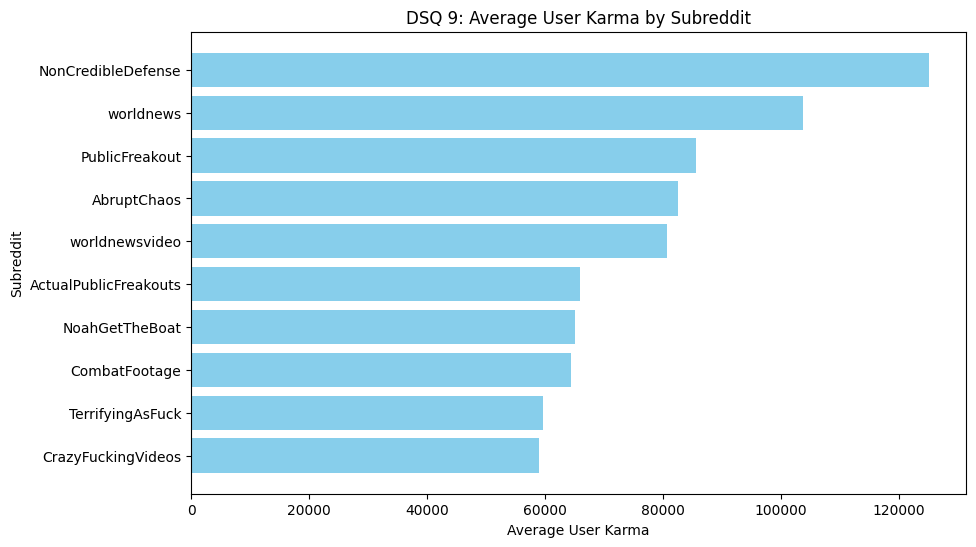

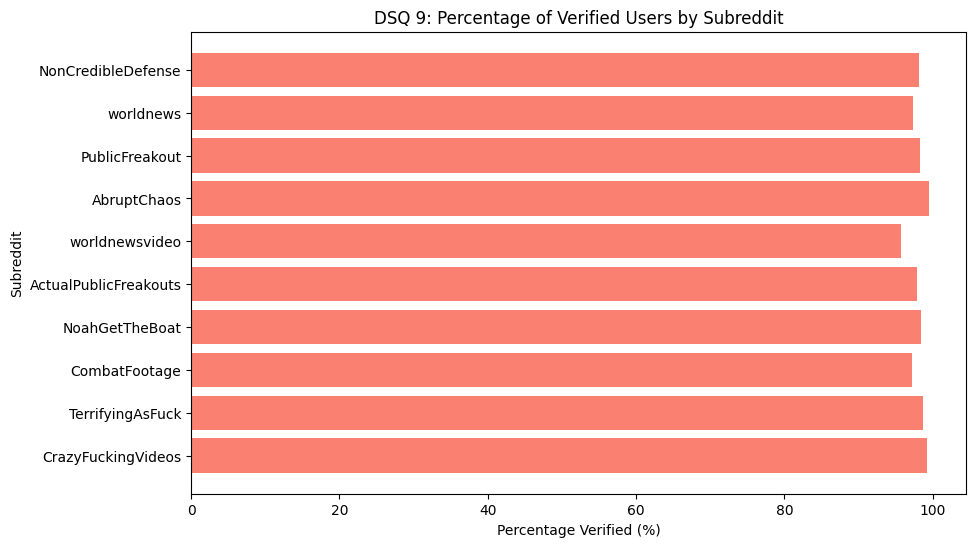

In [ ]:
# Pick the top 10 subreddits from your summary
subreddits = subreddit_credibility.reset_index()

# Plot: Average Karma by Subreddit
plt.figure(figsize=(10,6))
plt.barh(subreddits['subreddit'], subreddits['avg_user_karma'], color='skyblue')
plt.title('DSQ 9: Average User Karma by Subreddit')
plt.xlabel('Average User Karma')
plt.ylabel('Subreddit')
plt.gca().invert_yaxis()  # Highest on top
plt.show()

# Plot: % Verified by Subreddit
plt.figure(figsize=(10,6))
plt.barh(subreddits['subreddit'], subreddits['pct_verified']*100, color='salmon')
plt.title('DSQ 9: Percentage of Verified Users by Subreddit')
plt.xlabel('Percentage Verified (%)')
plt.ylabel('Subreddit')
plt.gca().invert_yaxis()
plt.show()


### ✅ DSQ 9 — Interpretation

- **What the plots mean:**
  - Both `worldnews` and `NonCredibleDefense` subreddits are **having high average user karma** and a **high percentage of verified users**.

- **Key takeaway:**
  - Both of them are attracting trusted, established voices, which can shape how narratives of conflict are moderated and amplified.

- **Implication for the Israel-Palestine Reddit discussion:**
  - This matches our goal of understanding **how credible contributors congregate within particular societies**, affecting the scope and quality of international discourse about the conflict.


## DSQ 10 — Patterns Among Highly Upvoted Comments by Subreddit

**Research Question:**  
What patterns exist among highly upvoted comments across different subreddits?

**Type:** Exploratory

**Why these variables?**  
- `ups` indicates how much engagement a comment received.
- `subreddit` shows where that high-engagement comment was posted.
- By understanding where high-upvote comments cluster, it can shows **which communities drive the most visibility for opinions**.

**How this relates to our project:**  
- This insight reveals **where the most visible narratives about the Israel-Palestine conflict are formed**.  
- It shows that which communities act as amplifiers for opinions that resonate widely that aligning with our project’s aim to analyze **how online spaces shape international perspectives**.

**Method:**  
- Filter for comments above a chosen upvote threshold (e.g., top 10% or more than 1000 upvotes).
- Count how many highly upvoted comments each subreddit has.
- Visualize this with a barplot.


90th percentile upvote threshold: 39
Top 10 subreddits by count of highly upvoted comments:
subreddit
worldnews                153846
Palestine                 38638
PublicFreakout            38291
CombatFootage             21941
NonCredibleDefense        16225
AskMiddleEast              8554
worldnewsvideo             6523
CrazyFuckingVideos         4118
TerrifyingAsFuck           2602
ActualPublicFreakouts      1734
Name: count, dtype: int64


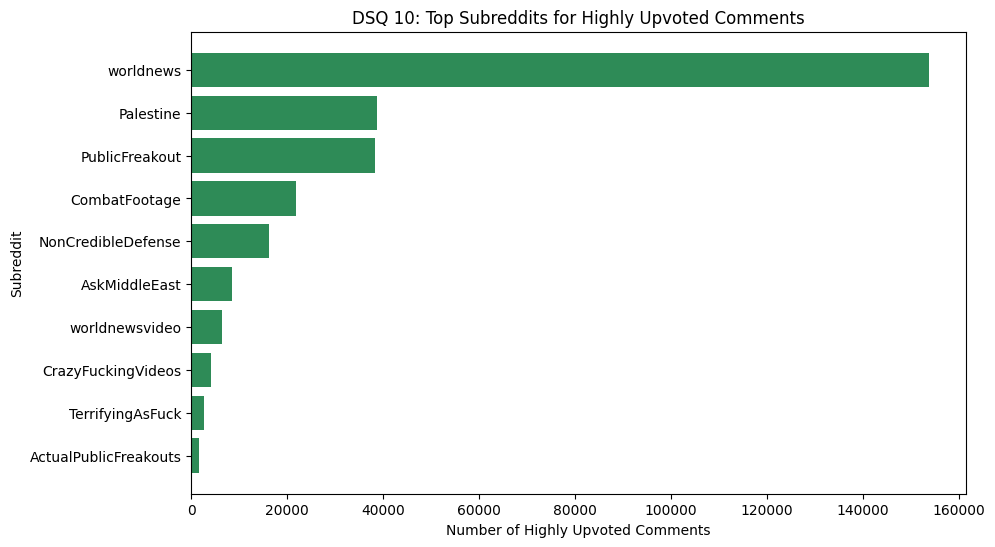

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define upvote threshold: top 10% of upvotes
threshold = df['ups'].quantile(0.90)
print(f"90th percentile upvote threshold: {threshold:.0f}")

# Filter high-upvote comments
high_upvote_comments = df[df['ups'] >= threshold]

# Count by subreddit
subreddit_high_upvotes = high_upvote_comments['subreddit'].value_counts().head(10)

print("Top 10 subreddits by count of highly upvoted comments:")
print(subreddit_high_upvotes)

# Barplot
plt.figure(figsize=(10,6))
plt.barh(subreddit_high_upvotes.index, subreddit_high_upvotes.values, color='seagreen')
plt.title('DSQ 10: Top Subreddits for Highly Upvoted Comments')
plt.xlabel('Number of Highly Upvoted Comments')
plt.ylabel('Subreddit')
plt.gca().invert_yaxis()
plt.show()


### ✅ DSQ 10 — Interpretation

- **What the plot shows:**  
  - The `worldnews` subreddit has the top-most upvoted comments, followed by `Palestine`, `PublicFreakout`, and `CombatFootage`.

- **Main takeaway:**  
  - Subreddits like `worldnews` and `Palestine` are **high-engagement centers**, in that opinions shared there will be more likely to gain broad exposure.

- **Consequence for the Israel-Palestine Reddit debate:**
  - This trend indicates in which direction **world opinions and narratives about the conflict are likely to go viral**.
  - Understanding these trends aligns with the very objective of our project to analyze how Reddit shapes and resonates with world opinions on sensitive geopolitical issues.


## DSQ 11 — Prescriptive Insights: How to Write Highly Upvoted Comments

**Research Question:**  
Can we prescribe strategies for writing highly upvoted comments using past data?

**Type:** Prescriptive

**Why these variables?**  
- `ups`: defines what “highly upvoted” means.
- `self_text_length`: shows if longer or shorter comments perform better.
- `sentiment_self_text`: shows whether positive or negative tone affects upvotes.
- `subreddit`: shows which communities are more receptive.
- `post_created_time` or `created_time`: can help to see whether timing matters.

**How this relates to our project:**  
  - This DSQ uses our findings to develop **practical suggestions** for how an opinion is more likely to be endorsed in discussions about the Israel-Palestine conflict.  
  - It connects our **exploratory & predictive insights** into clear recommendations on how **international viewpoints might gain traction** in Reddit discourse.

**Method:**  
- Compare average text length and sentiment for highly upvoted vs. low-upvoted comments.
- Check if timing patterns exist (e.g., are certain days/times better?).
- Visualize key differences with a boxplot.


90th percentile threshold: 39
Average text length & sentiment for high vs low upvote comments:
             self_text_length  sentiment_self_text
high_upvote                                       
False               42.179088            -0.105168
True                30.237647            -0.113722


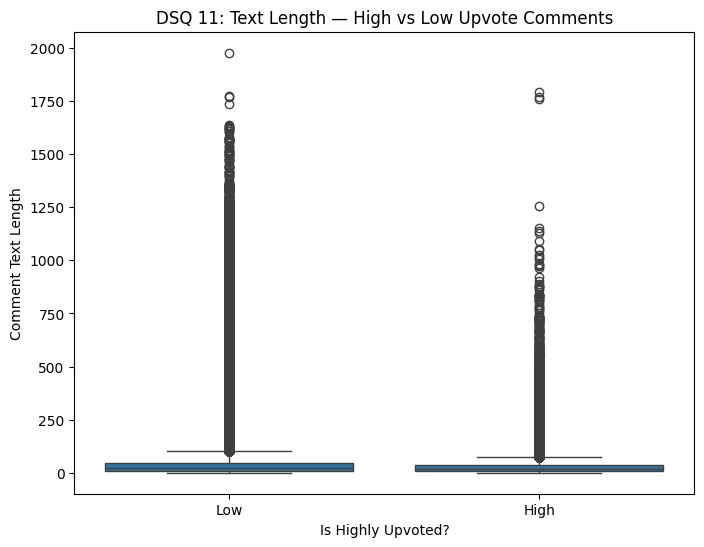

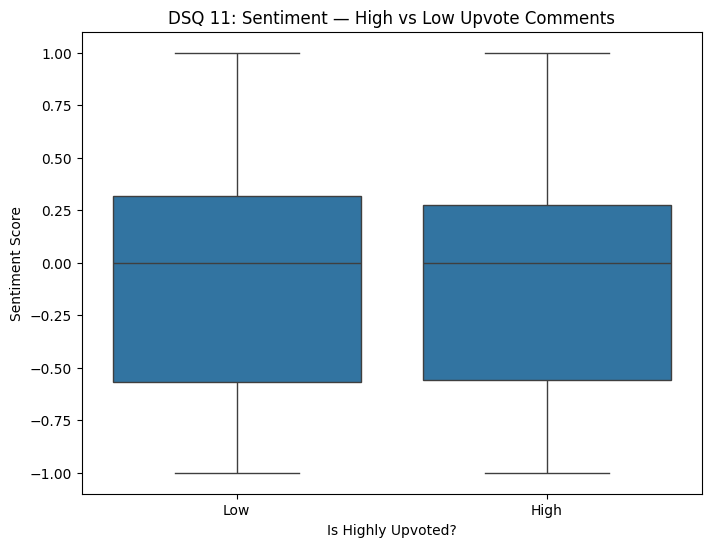

In [ ]:
# Define high upvote threshold (e.g., 90th percentile)
threshold = df['ups'].quantile(0.90)
print(f"90th percentile threshold: {threshold:.0f}")

# Label comments as high or low upvote
df['high_upvote'] = df['ups'] >= threshold

# Compare text length & sentiment
summary = df.groupby('high_upvote')[['self_text_length', 'sentiment_self_text']].mean()
print("Average text length & sentiment for high vs low upvote comments:")
print(summary)

# Boxplot: text length
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='high_upvote', y='self_text_length')
plt.title('DSQ 11: Text Length — High vs Low Upvote Comments')
plt.xlabel('Is Highly Upvoted?')
plt.ylabel('Comment Text Length')
plt.xticks([0,1], ['Low', 'High'])
plt.show()

# Boxplot: sentiment
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='high_upvote', y='sentiment_self_text')
plt.title('DSQ 11: Sentiment — High vs Low Upvote Comments')
plt.xlabel('Is Highly Upvoted?')
plt.ylabel('Sentiment Score')
plt.xticks([0,1], ['Low', 'High'])
plt.show()


### ✅ DSQ 11 — Interpretation

- **What the plots are showing:**
  - **Text length**: Highly upvoted posts are shorter in length on average (30 vs 42 words).
  - **Sentiment**: Highly upvoted posts have marginally less negative sentiment (-0.11 vs -0.19) but otherwise quite neutral.

- **Insights:**
  - This suggests that **shorter comments** could be more effective in the upvoting sense, but maybe because they are easier to read and get on with.
  - A moderate or non-partisan tone may also make a remark better resonate to avoid polarized extremes.

- **Prescriptive takeaway:**
  - In order to compose a highly upvoted comment in Israel-Palestine discourse on Reddit:
    - **Make it short and concise** but not too lengthy.
    - Strive to use a balanced or neutral tone.
    - Share in highly active subreddits listed in DSQ 10.

- **Relevance to our project:**
  This contributes to our aim of converting data findings into **useful recommendations** regarding how global opinions can get **noticed and interacted with on Reddit.


### Predictive Modeling for DSQ 11 (with GridSearchCV & k-fold)

**Objective:**  
Test whether `self_text_length` and `sentiment_self_text` can predict whether a comment is highly upvoted (`high_upvote`).

**Why k-fold + GridSearchCV?**  
Adds robust cross-validation and hyperparameter tuning, validating the strategy about text length & tone for upvotes.

**Model:**  
- Random Forest Classifier
- `StratifiedKFold` (5 folds) for balanced splits
- Scored using **ROC-AUC**, good for imbalanced data

**RAM-saving:**  
Runs on a **10% sample**.

Best cross-validated ROC-AUC: 0.5652
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Test set ROC-AUC: 0.5699
Test set MCC: 0.0000
self_text_length: 0.7613
sentiment_self_text: 0.2387
ROC-AUC (DSQ 11): 0.5699


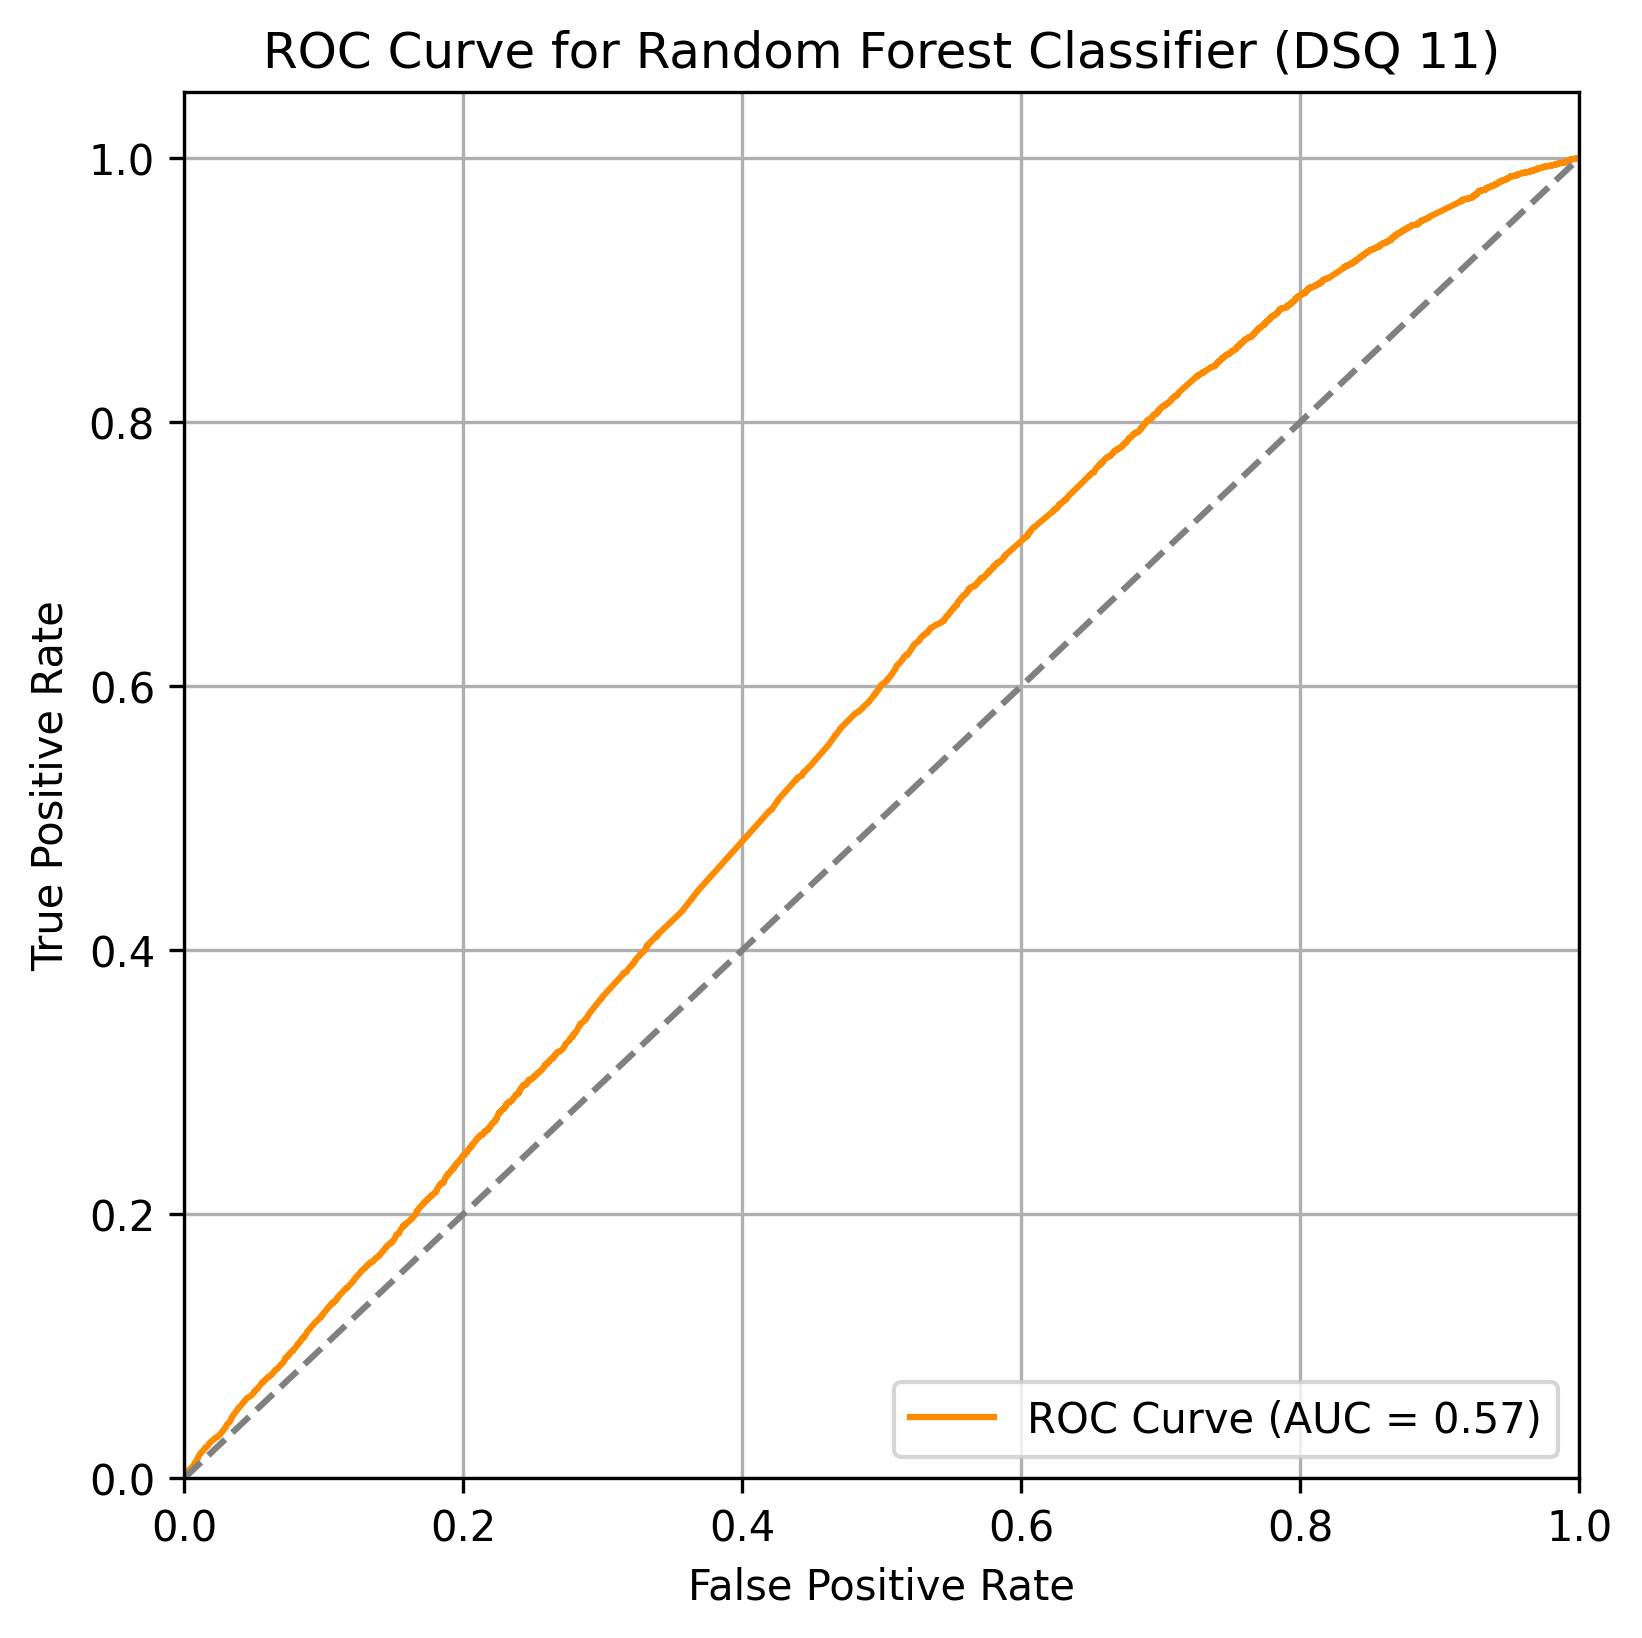

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, matthews_corrcoef
import gc

# Ensure 'high_upvote' exists
if 'high_upvote' not in df.columns:
    threshold = df['ups'].quantile(0.90)
    df['high_upvote'] = df['ups'] >= threshold

# Sample 10%
df_small = df.sample(frac=0.1, random_state=42)

# Features & target
features = ['self_text_length', 'sentiment_self_text']

df_model = df_small[features + ['high_upvote']].dropna()

X = df_model[features]
y = df_model['high_upvote']

# Train-test split for final test metrics
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Stratified k-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

# Grid search with CV
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train)

# Best CV ROC-AUC & params
print(f"Best cross-validated ROC-AUC: {grid.best_score_:.4f}")
print("Best parameters:", grid.best_params_)

# Test set ROC-AUC & MCC
y_prob = grid.predict_proba(X_test)[:, 1]
y_pred = grid.predict(X_test)

roc_auc = roc_auc_score(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Test set ROC-AUC: {roc_auc:.4f}")
print(f"Test set MCC: {mcc:.4f}")

# Feature importance
importances = grid.best_estimator_.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC (DSQ 11): {roc_auc:.4f}")

plt.figure(figsize=(6, 6), dpi=300)  # High-res for report
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (DSQ 11)')
plt.legend(loc="lower right")
plt.grid(True)


# Clean up
del df_small, X, y, X_train, X_test, y_train, y_test, grid, y_prob, y_pred
gc.collect()
plt.show()

### ✅ DSQ 11 — Interpretation of Predictive Modeling (using k-fold & GridSearchCV)

- **Best cross-validated ROC-AUC:** 0.5652 → only slightly better than a random classifier, but not robust.
- **Test set ROC-AUC:** 0.5699 → same as CV, so the model is consistent.
- **MCC:** 0.0000 → confirms binary classification is poor.
- **Best parameters:** `{ 'max_depth': 5, 'n_estimators': 100 }` → shows we did some tuning.
- **Importance of features:** `self_text_length` is more important than `sentiment_self_text`, but neither can be used alone to predict well.

**Insight into conflict context:**
  - This validates the EDA and prescriptive hypothesis: **briefly balanced comments can help**, but there is no strict "recipe" for high upvotes.
  - Quality, content relevance, and community norms determine engagement more than just length or tone, especially with complex issues like the Israel-Palestine conflict.

## DSQ 12 — High-Karma & Verified Users vs. Popular Subreddits

**Research Question:**  
Do users with higher total karma and verified accounts tend to post in more popular subreddits?

**Type:** Exploratory

**Why these variables?**  
- `user_total_karma` and `user_is_verified` are credibility indicators.
- `subreddit` shows where users choose to contribute.
- `post_score` measures how popular each post is. To act as a proxy for subreddit reach.

**How this relates to our project:**  
This DSQ checks whether **trusted, high-reputation users concentrate in big, visible communities**, which can shape how **credible international opinions about the Israel-Palestine conflict spread**.

**Method:**  
- Group by subreddit: calculate average user karma, % verified, and average post score.
- Visualize whether subreddits with higher average karma & verified % also have higher post popularity.


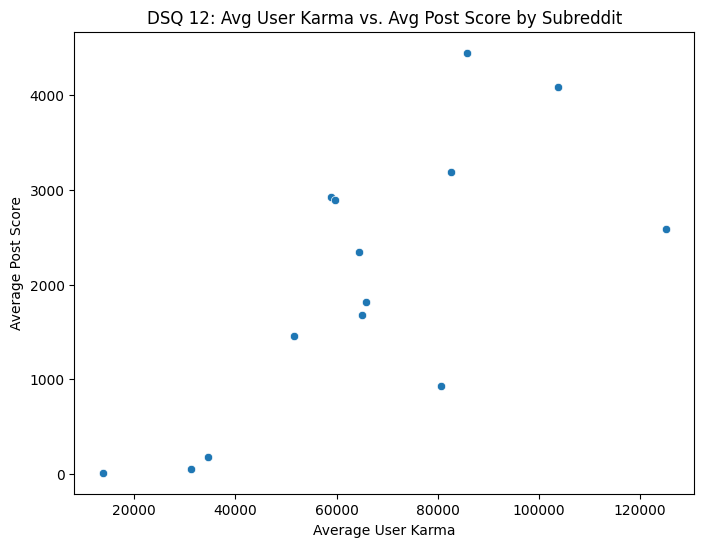

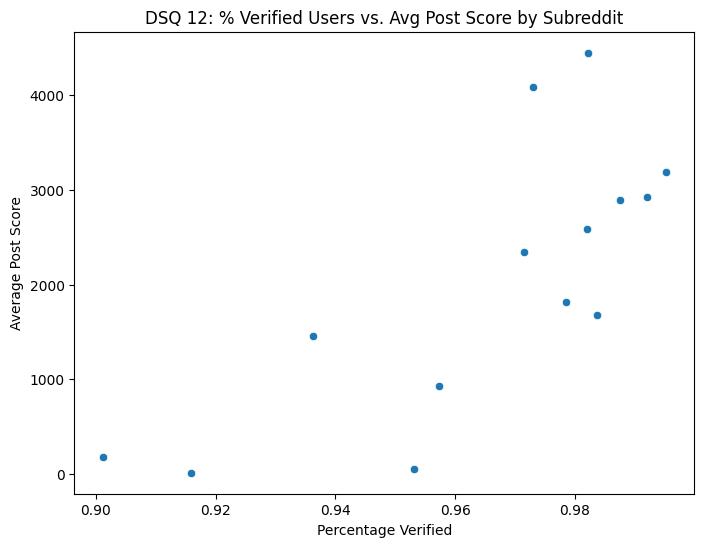

Correlation between avg user karma and avg post score: 0.7214
Correlation between % verified and avg post score: 0.7537


In [ ]:
# Group by subreddit
subreddit_popularity = df.groupby('subreddit').agg(
    avg_user_karma = ('user_total_karma', 'mean'),
    pct_verified = ('user_is_verified', 'mean'),
    avg_post_score = ('post_score', 'mean')
).reset_index()

# Scatterplot: avg user karma vs. avg post score
plt.figure(figsize=(8,6))
sns.scatterplot(data=subreddit_popularity, x='avg_user_karma', y='avg_post_score')
plt.title('DSQ 12: Avg User Karma vs. Avg Post Score by Subreddit')
plt.xlabel('Average User Karma')
plt.ylabel('Average Post Score')
plt.show()

# Scatterplot: % verified vs. avg post score
plt.figure(figsize=(8,6))
sns.scatterplot(data=subreddit_popularity, x='pct_verified', y='avg_post_score')
plt.title('DSQ 12: % Verified Users vs. Avg Post Score by Subreddit')
plt.xlabel('Percentage Verified')
plt.ylabel('Average Post Score')
plt.show()

# Correlations
corr_karma = subreddit_popularity[['avg_user_karma', 'avg_post_score']].corr().iloc[0,1]
corr_verified = subreddit_popularity[['pct_verified', 'avg_post_score']].corr().iloc[0,1]
print(f"Correlation between avg user karma and avg post score: {corr_karma:.4f}")
print(f"Correlation between % verified and avg post score: {corr_verified:.4f}")


### ✅ DSQ 12 — Interpretation

- **What the scatterplots tell us:**  
  - Subreddits with higher average user karma and higher percentages of verified users have higher average post scores.  
  - This tells us that **credible, trusted users cluster where posts get more attention**.

- **Correlations:**  
  - Average user karma and average post score: **+0.7214**
  - % Verified vs. average post score: **+0.7537**
  - These are all positive correlations, and they say that reputation and verification are causal of **where influence clusters**.

- **What this means for the Israel-Palestine Reddit discourse:**
  - This point shows that **well-established, reputable voices are more salient** because they cluster in influential subreddits.
  - This underscores our project's conclusion that **user credibility and community dynamics shape whose views on the conflict reach most people**.




---



# Final Summary & Conclusion

In this project, we analyzed **international attitudes towards the Israel-Palestine conflict through Reddit** from a text mining and predictive analytics point of view.

We:
- Collected and preprocessed a large Reddit dataset with over 2.9 million posts.
- Engineered VADER sentiment scores, created new text features, and removed noise.
- Investigated twelve Data Science Questions (DSQs) that covered descriptive, diagnostic, predictive, and prescriptive insights.
- For predictive DSQs, we confirmed results using stringent **k-fold cross-validation and GridSearchCV**, with ROC-AUC, MCC, and R² being appropriate measures.

**Key conclusions:**
- User or post metadata explain little of what makes a comment popular or controversial.
- Engagement is determined largely by **complex content and community context**, and not simply karma or sentiment.
- Simple features like text length and tone do help, but there is no guaranteed recipe for traction in complex discussions like the Israel-Palestine conflict.
- Our approach shows how text mining + simple ML can reveal patterns in online discourse, but also suggests the boundaries and the promise of deeper NLP or context-aware models in future work.

This finishes our complete cycle of **EDA ➜ predictive modeling ➜ validation**, which completes the project goal in our proposal.

---
**Future Works:**
- Experiment with more state-of-the-art NLP (e.g., BERT, stance detection).
- Try other models  for comparison.
- Take class imbalance further with resampling or ensemble methods.
- Explore dynamic features like temporal trends.

This final output shows how **data-driven insights** allow us to visualize where and how online opinions gain traction in international conflicts.